In [1]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
import os

# Model Sensitivity Analysis (PPSO, SGD, Adam)

In [12]:
os.chdir("/Users/st022/OneDrive/Documents/Carnegie_Mellon/Spring2025/optim/workdir2/PSO-for-NNs")
os.getcwd()

'c:\\Users\\st022\\OneDrive\\Documents\\Carnegie_Mellon\\Spring2025\\optim\\workdir2\\PSO-for-NNs'

In [13]:
from models.mlp import MLP
from trainers.train_pso import train_pso
from trainers.train_sgd_adam import train_gd
from data.data import load_ucidata

In [23]:
# load the digits dataset
data = "wine"
model_size = {
    'small' : [16],
    'medium': [16, 32, 16],
    'large': [16, 32, 64, 32, 16],
}
optimizers = ['SGD', 'Adam', 'PPSO']
output = "results_dir"

In [43]:
def get_convergence_epoch(history, thresh=1e-4, window=80):
    """
    Get the epoch at which the loss converges.
    """
    for i in range(len(history) - window):
        segment = history[i:i + window]
        if max(segment) - min(segment) < thresh:
            return i + window
    return len(history)

In [44]:
def plot_model_comparison(size_label, results):
    plt.figure(figsize=(14, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    for opt, metrics in results.items():
        plt.plot(metrics["loss_history"], label=opt)
    plt.title(f"{size_label} Model - Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    for opt, metrics in results.items():
        plt.plot(metrics["accuracy_history"], label=opt)
    plt.title(f"{size_label} Model - Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

load the dataset digits from UC Irvine 7K+ 8x8 images, 10 labels

In [45]:
train_loader, test_loader, inp_dim, out_dim = load_ucidata(data)

## Experiment Set Up

In [46]:
loss = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [47]:
os.getcwd()

'c:\\Users\\st022\\OneDrive\\Documents\\Carnegie_Mellon\\Spring2025\\optim\\workdir2\\PSO-for-NNs'


--- Training small model ---
[SGD] Epoch 0: Loss = 5.6480, Accuracy = 0.3169
[SGD] Epoch 50: Loss = 5.5206, Accuracy = 0.3380
[SGD] Epoch 100: Loss = 5.3785, Accuracy = 0.4014
[SGD] Epoch 150: Loss = 5.2210, Accuracy = 0.4789
[SGD] Epoch 200: Loss = 5.1446, Accuracy = 0.5211
[SGD] Epoch 250: Loss = 4.9896, Accuracy = 0.5986
[SGD] Epoch 300: Loss = 4.8322, Accuracy = 0.6268
[Adam] Epoch 0: Loss = 5.5928, Accuracy = 0.2817
[Adam] Epoch 50: Loss = 1.1958, Accuracy = 0.9718
[Adam] Epoch 100: Loss = 0.3799, Accuracy = 0.9930
[Adam] Epoch 150: Loss = 0.2160, Accuracy = 0.9930
[Adam] Epoch 200: Loss = 0.1554, Accuracy = 1.0000
[Adam] Epoch 250: Loss = 0.1220, Accuracy = 1.0000
[Adam] Epoch 300: Loss = 0.0771, Accuracy = 1.0000
[PPSO] Epoch 0: Loss = 0.8107, Accuracy = 0.6620, Iteration Time = 0.3741 sec
[PPSO] Epoch 50: Loss = 0.0032, Accuracy = 1.0000, Iteration Time = 0.3136 sec
[PPSO] Epoch 100: Loss = 0.0004, Accuracy = 1.0000, Iteration Time = 0.3085 sec
[PPSO] Epoch 150: Loss = 0.0000,

<Figure size 432x288 with 0 Axes>

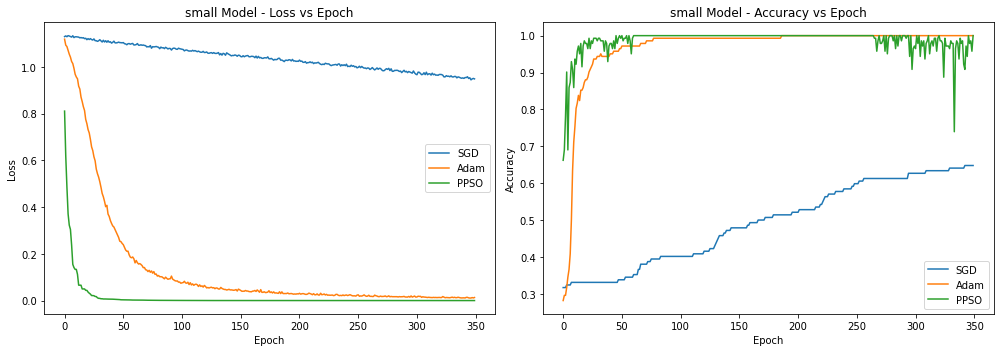


--- Training medium model ---
[SGD] Epoch 0: Loss = 5.4204, Accuracy = 0.4014
[SGD] Epoch 50: Loss = 5.3296, Accuracy = 0.4014
[SGD] Epoch 100: Loss = 5.3681, Accuracy = 0.4014
[SGD] Epoch 150: Loss = 5.3246, Accuracy = 0.4014
[SGD] Epoch 200: Loss = 5.3067, Accuracy = 0.4014
[SGD] Epoch 250: Loss = 5.3270, Accuracy = 0.4014
[SGD] Epoch 300: Loss = 5.3501, Accuracy = 0.4014
[Adam] Epoch 0: Loss = 5.5825, Accuracy = 0.2817
[Adam] Epoch 50: Loss = 0.1737, Accuracy = 0.9930
[Adam] Epoch 100: Loss = 0.0293, Accuracy = 1.0000
[Adam] Epoch 150: Loss = 0.0098, Accuracy = 1.0000
[Adam] Epoch 200: Loss = 0.0042, Accuracy = 1.0000
[Adam] Epoch 250: Loss = 0.0028, Accuracy = 1.0000
[Adam] Epoch 300: Loss = 0.0015, Accuracy = 1.0000
[PPSO] Epoch 0: Loss = 1.7383, Accuracy = 0.3451, Iteration Time = 0.3306 sec
[PPSO] Epoch 50: Loss = 0.0346, Accuracy = 0.9859, Iteration Time = 0.3380 sec
[PPSO] Epoch 100: Loss = 0.0005, Accuracy = 0.9859, Iteration Time = 0.3851 sec
[PPSO] Epoch 150: Loss = 0.0000

<Figure size 432x288 with 0 Axes>

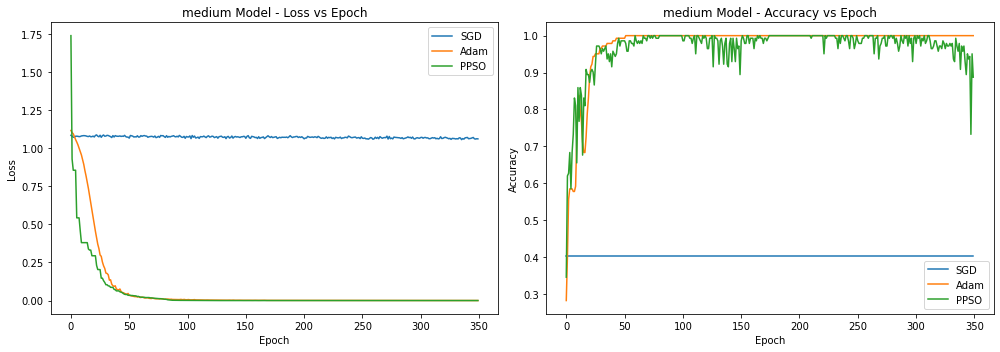


--- Training large model ---
[SGD] Epoch 0: Loss = 5.5606, Accuracy = 0.3169
[SGD] Epoch 50: Loss = 5.5570, Accuracy = 0.3169
[SGD] Epoch 100: Loss = 5.5278, Accuracy = 0.3169
[SGD] Epoch 150: Loss = 5.5370, Accuracy = 0.3169
[SGD] Epoch 200: Loss = 5.4821, Accuracy = 0.3169
[SGD] Epoch 250: Loss = 5.4818, Accuracy = 0.3169
[SGD] Epoch 300: Loss = 5.4725, Accuracy = 0.3169
[Adam] Epoch 0: Loss = 5.5798, Accuracy = 0.3169
[Adam] Epoch 50: Loss = 0.0108, Accuracy = 1.0000
[Adam] Epoch 100: Loss = 0.0015, Accuracy = 1.0000
[Adam] Epoch 150: Loss = 0.0005, Accuracy = 1.0000
[Adam] Epoch 200: Loss = 0.0002, Accuracy = 1.0000
[Adam] Epoch 250: Loss = 0.0001, Accuracy = 1.0000
[Adam] Epoch 300: Loss = 0.0001, Accuracy = 1.0000
[PPSO] Epoch 0: Loss = 14.3886, Accuracy = 0.3944, Iteration Time = 0.4322 sec
[PPSO] Epoch 50: Loss = 0.1209, Accuracy = 0.8732, Iteration Time = 0.3761 sec
[PPSO] Epoch 100: Loss = 0.0346, Accuracy = 0.9859, Iteration Time = 0.4103 sec
[PPSO] Epoch 150: Loss = 0.0157

<Figure size 432x288 with 0 Axes>

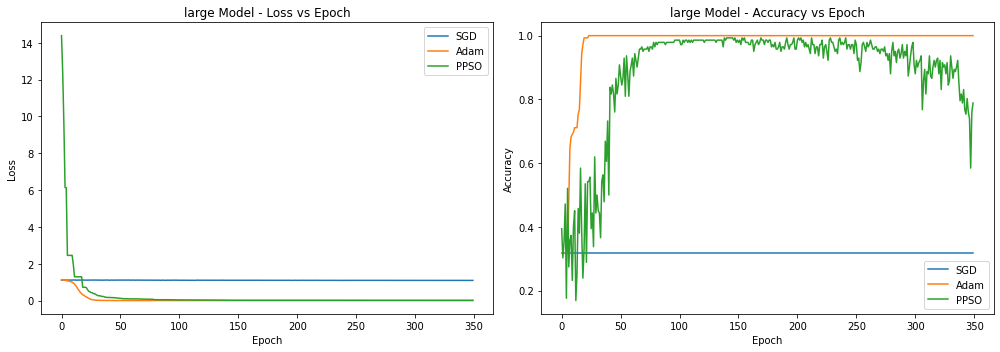

In [50]:
summary = []

for size_name, hiddens in model_size.items():
    results = {}
    print(f"\n--- Training {size_name} model ---")

    for opt in optimizers:
        model = MLP(inp_dim, hiddens, out_dim).to(device)
        start_time = time.time()

        if opt == "PPSO":
            optimizer, _, acc_hist = train_pso(
                model,
                train_loader,
                loss,
                variant=opt,
                num_particles=50,
                num_iterations=350,
                plot_convergence=False,
            )
            loss_hist = optimizer.history
        else:
            if opt == "SGD":
                lr = 0.001
            else:
                lr = 0.001
            model, loss_hist, acc_hist = train_gd(
                model,
                train_loader,
                loss,
                optimizer_type=opt,
                lr=lr,
                num_epochs=350,
                plot_convergence=False,
            )

        end_time = time.time()
        elapsed_time = end_time - start_time
        final_acc = acc_hist[-1]
        convergence_epoch = get_convergence_epoch(acc_hist)

        summary.append({
            "model_size": size_name,
            "optimizer": opt,
            "final_acc": final_acc,
            "convergence_epoch": convergence_epoch,
            "elapsed_time": elapsed_time,
        })

        results[opt] = {
            "loss_history": loss_hist,
            "accuracy_history": acc_hist
        }

        # Save individual accuracy plots
        plt.plot(acc_hist, label=f"{opt}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy vs Epochs - {opt} - {size_name}")
        plt.legend()
        plt.savefig(f"accuracy_{opt}_{size_name}.png")
        plt.clf()

    # Plot combined loss + accuracy for current model size
    plot_model_comparison(size_name, results)